This Notebook needs https://github.com/mineo/mpd_pydb for reading MPDs database

In [1]:
%pylab inline
matplotlib.style.use("ggplot")
import mpd_pydb as mpd
from os.path import expanduser
db = mpd.Database.read_file(expanduser("~/.mpd/mpd.db"))
df = db.to_dataframe()

Populating the interactive namespace from numpy and matplotlib


In [2]:
df[["Album", "Artist", "AlbumArtist", "Title", "Date"]].describe()

,Album,Artist,AlbumArtist,Title,Date
count,18031,18086,17901,18086,17315
unique,1496,3791,705,16700,998
top,A Traveler’s Guide to Space and Time,John Williams,Various Artists,Intro,2003
freq,168,311,2837,16,237


# Song length distribution

In [3]:
times = df["Time"]
times.describe()

count    18092.000000
mean       218.061650
std        140.403164
min          0.026000
25%        142.634000
50%        209.802000
75%        267.875750
max       4620.120000
Name: Time, dtype: float64

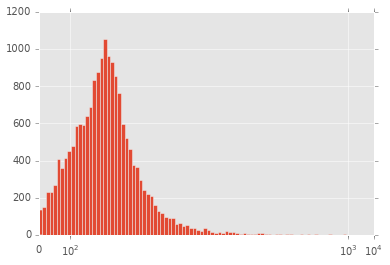

In [4]:
fig, ax = plt.subplots()
times.hist(ax=ax, bins=400)
ax.set_xscale("symlog", linthreshx=1000, linscalex=11)

Ok, there seem be some very long songs in the DB, let's ignore them for now. We're going to limit the song length to 600 seconds (10 minutes).

(0.0, 125)

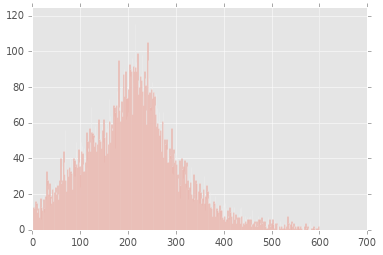

In [5]:
fig, ax = plt.subplots()
times.clip_upper(600).hist(ax=ax, bins=600)
ax.set_ylim(top=125)

# Release dates

In [6]:
def date_to_year(series):
    def conv(date):
        if date is None:
            return date
        return int(date.split("-")[0])
    return series.apply(conv)
date_data = df[["Date", "Album"]]
date_data = date_data.assign(Date=date_to_year(date_data["Date"]))

In [7]:
def plot_date_data(dates):
    d = dates["Date"]
    min_date = d.min()
    max_date = d.max()
    d.hist(range=(min_date, max_date),
                  bins=max_date-min_date)

## Release date histogram with dates from tracks

Dates of albums with more tracks will have more impact on this plot

In [8]:
date_data.describe()

,Date
count,17315.000000
mean,2007.724170
std,4.646786
min,1984.000000
25%,2005.000000
50%,2008.000000
75%,2011.000000
max,2015.000000


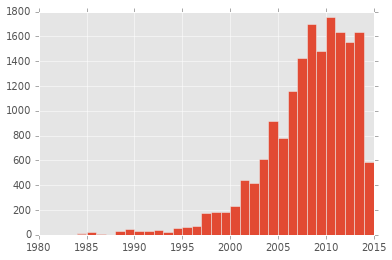

In [9]:
plot_date_data(date_data)

## Release date histogram with dates from albums

First, select the distinct Album-Date data and then plot it.

In [10]:
new_date_data = date_data.drop_duplicates()
new_date_data.describe()

,Date
count,1414.000000
mean,2006.801980
std,4.799781
min,1984.000000
25%,2004.250000
50%,2007.000000
75%,2010.000000
max,2015.000000


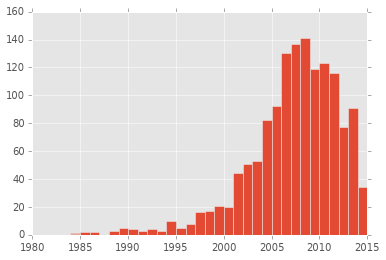

In [11]:
plot_date_data(new_date_data)

# Amount of albums with unknown dates

In [12]:
unknown_dates = new_date_data.assign(DateKnown=~np.isnan(new_date_data["Date"]))\
    [["DateKnown", "Album"]].\
    groupby(["DateKnown"]).\
    count()
unknown_dates

,Album
DateKnown,
False,96
True,1414


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1ff056950>], dtype=object)

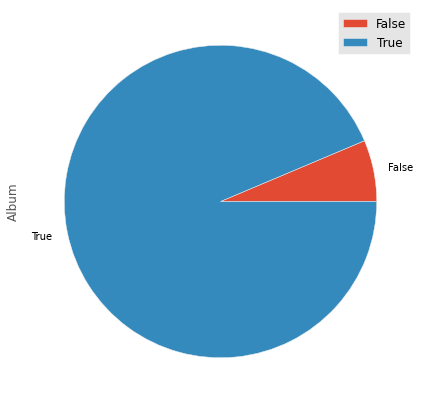

In [13]:
unknown_dates.plot(kind="pie", subplots=True, figsize=(7,7))

# Artist-Album relationships

In [14]:
df[["Artist", "Album"]].drop_duplicates().\
    groupby("Album").count().sort(["Artist"], ascending=False)

,Artist
Album,
Harmony of Heroes,76
Donkey Kong Country 3: Double the Trouble!,63
Final Fantasy VI: Balance and Ruin,59
111 Years of Deutsche Grammophon,59
Varèse Sarabande: A 30th Anniversary Celebration,56
Chiptunes = WIN: Volume 3,51
Chiptunes = WIN \m|♥|m/,51
"Chiptunes = WIN, Volume 2",51
Wild Arms: ARMed and DANGerous,49


In [17]:
art_alb_data = df[["AlbumArtist", "Album"]].drop_duplicates().\
    groupby("AlbumArtist").count()

In [16]:
art_alb_data.sort(["Album"], ascending=False)

,Album
AlbumArtist,
Various Artists,239
OverClocked ReMix,38
Zelda Reorchestrated,12
Binärpilot,12
Disasterpeace,11
The Prodigy,11
Armin van Buuren,10
John Williams,10
Rammstein,10
